In [1]:
# import ColorSpace function
from ipynb.fs.full.ColorSpace import colorspace

# select hex code
hex_base = '89F4EC'

# run
palettes = colorspace(hex_base)
palettes

{'Generic Gradient': ['#89f4ec',
  '#88fadb',
  '#97fdc2',
  '#b2fea6',
  '#d3fd8a',
  '#f9f871'],
 'Matching Gradient': ['#89f4ec',
  '#54d6f2',
  '#51b4ef',
  '#768ed8',
  '#9663ab',
  '#9e386e'],
 'Spot Palette': ['#89f4ec', '#4dbbb4', '#c0fcf7', '#99005d'],
 'Twisted Spot Palette': ['#89f4ec', '#b70075', '#ffe4f8', '#b08598'],
 'Classy Palette': ['#89f4ec', '#334b49', '#95b1ae', '#adc6ff', '#7690ca'],
 'Cube Palette': ['#89f4ec', '#00c48f', '#545479'],
 'Switch Palette': ['#89f4ec', '#00413e', '#b70075', '#e8f3f1'],
 'Small Switch Palette': ['#89f4ec', '#def6ec', '#499176'],
 'Skip Gradient': ['#89f4ec', '#a3f6a8', '#6cbd73', '#358742'],
 'Natural Palette': ['#89f4ec', '#00aaa1', '#e9fdfb', '#e8f3f1'],
 'Matching Palette': ['#89f4ec', '#334b49', '#95b1ae', '#ffccef', '#df95b7'],
 'Squash Palette': ['#89f4ec', '#ffa8fc', '#cccb67'],
 'Grey Friends': ['#89f4ec', '#334b49', '#95b1ae'],
 'Dotting Palette': ['#89f4ec', '#95b1ae', '#adc6ff', '#a5abbd'],
 'Skip Shade Gradient': ['#89f4ec'

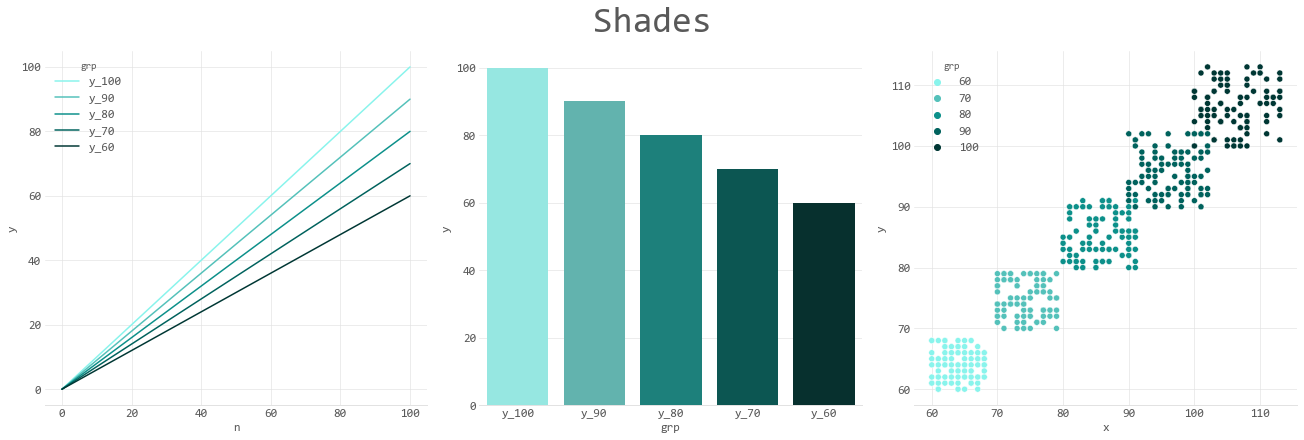

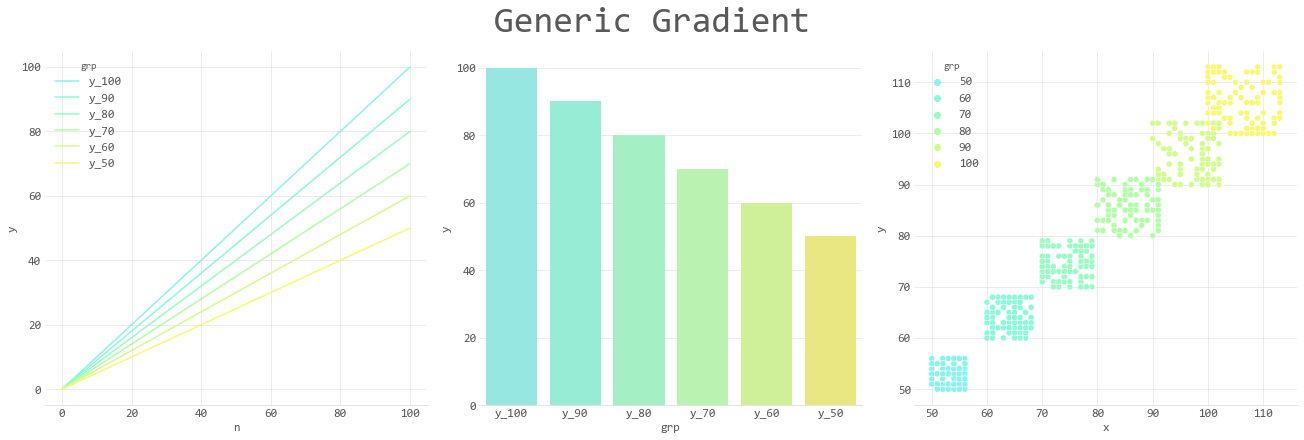

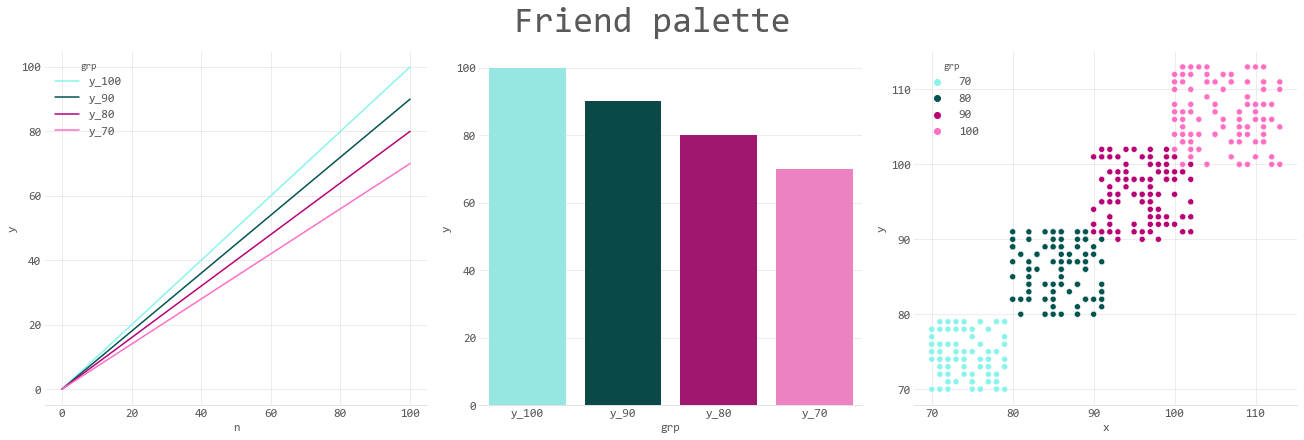

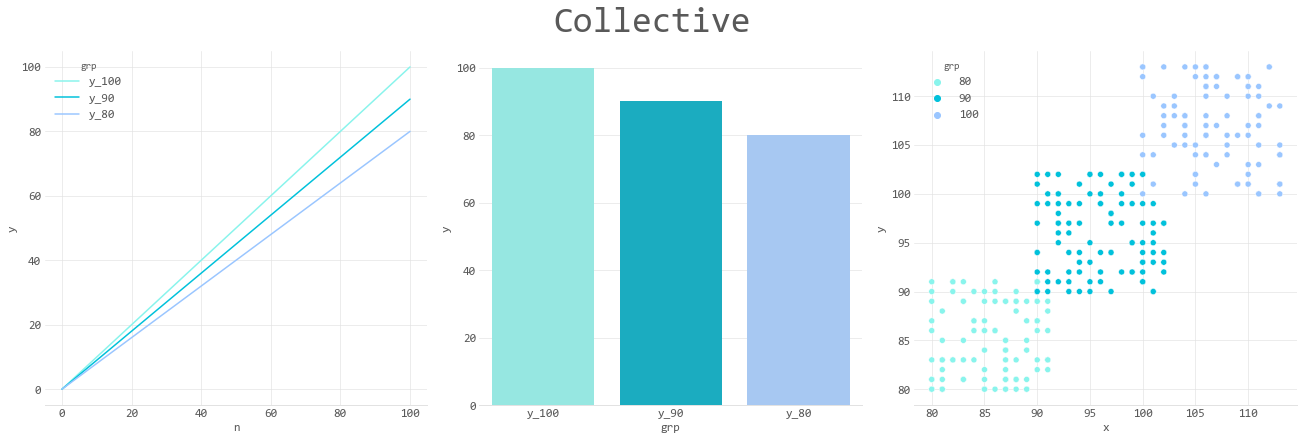

In [2]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# style
from ipynb.fs.full.Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# test viz
def viz(p):

    # variables
    c = palettes[p]
    l = len(c)
    y_end = 100
    y_bgn = y_end - ((l*10)-10)
    y_values = np.arange(y_bgn,y_end+1,10)[::-1]
    
    # graph data
    df = pd.DataFrame()
    for y in y_values:
        m = 1.01
        values = np.arange(0, y*m, y*(m-1))
        ttl = f'y_{str(y)}'
        df[ttl] = values.tolist()
        
    df['n'] = df.index
    df_line = df.melt(id_vars='n', var_name='grp', value_name='y')
    df_bar = df[-1:].melt(id_vars='n', var_name='grp', value_name='y')
    
    grp = []
    for n in range(100):
        for y in y_values:
            grp.append(y)
        
    df_sct = pd.DataFrame({'grp':grp})
    df_sct['x'] = np.random.randint(df_sct['grp'], df_sct['grp']*1.15)
    df_sct['y'] = np.random.randint(df_sct['grp'], df_sct['grp']*1.15)
    
    ###### embedding the palette as a viz variable ######
    fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
    sns.lineplot(ax=ax1, data=df_line, x='n', y='y', hue='grp', palette=c)
    sns.barplot(ax=ax2, data=df_bar, x='grp', y='y', palette=c)
    sns.scatterplot(ax=ax3, data=df_sct, x='x', y='y', hue='grp', palette=c)
    fig.suptitle(f'{p}')
    #fig.savefig(f'{p}.png')
    
    return fig

# run
palette_tests = ['Shades', 'Generic Gradient', 'Friend palette', 'Collective']
for p in palette_tests:
    viz(p)